# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [ ]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [26]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/archa/Desktop/Assignment 6/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [ ]:
# Read in the lyrics data
# Construct the full path to the lyrics folder
lyrics_path = os.path.join(data_location, lyrics_folder)


lyrics_data = {}

for artist in os.listdir(lyrics_path):
    artist_folder = os.path.join(lyrics_path, artist)
    if os.path.isdir(artist_folder):
        lyrics_data[artist] = {}
        for song_file in os.listdir(artist_folder):
            if song_file.endswith(".txt"):
                song_path = os.path.join(artist_folder, song_file)
                with open(song_path, "r", encoding="utf-8") as f:
                    song_name = song_file[:-4]
                    lyrics_data[artist][song_name] = f.read()


In [ ]:
# Read in the twitter data
# Construct the full path to the twitter folder
twitter_path = os.path.join(data_location, twitter_folder)

twitter_data = {}

for filename in os.listdir(twitter_path):
    if filename.endswith(".txt") and "_data" not in filename:
        artist = filename.replace("_followers", "").replace(".txt", "")
        with open(os.path.join(twitter_path, filename), "r", encoding="utf-8") as f:
            lines = [line.strip() for line in f if line.strip()]
        twitter_data[artist] = lines

In [30]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.
# Construct paths
positive_path = os.path.join(data_location, positive_words_file)
negative_path = os.path.join(data_location, negative_words_file)
tidytext_path = os.path.join(data_location, tidy_text_file)

sentiment_dict = {}

# Load positive words
if os.path.exists(positive_path):
    with open(positive_path, "r", encoding="utf-8") as f:
        for line in f:
            word = line.strip()
            if word and not word.startswith(";"):
                sentiment_dict[word] = 1
else:
    print(f"⚠️ File not found: {positive_path}")

# Load negative words
if os.path.exists(negative_path):
    with open(negative_path, "r", encoding="utf-8") as f:
        for line in f:
            word = line.strip()
            if word and not word.startswith(";"):
                sentiment_dict[word] = -1
else:
    print(f"⚠️ File not found: {negative_path}")

# Load tidytext sentiments (tab-delimited: word <tab> sentiment)
if os.path.exists(tidytext_path):
    with open(tidytext_path, "r", encoding="utf-8") as f:
        reader = csv.reader(f, delimiter='\t')
        for row in reader:
            if len(row) >= 2:
                word, sentiment = row[0], row[1].lower()
                score = 1 if sentiment == "positive" else -1
                sentiment_dict[word] = score
else:
    print(f"⚠️ File not found: {tidytext_path}")

# Optionally, print the number of unique words loaded
print(f"Total sentiment words loaded: {len(sentiment_dict)}")

Total sentiment words loaded: 11408


## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [ ]:
# Score sentiment for each song by summing up the sentiment values of each word
song_sentiment_scores = {}

for artist, songs in lyrics_data.items():
    song_sentiment_scores[artist] = {}
    for song_title, lyrics in songs.items():
        words = lyrics.lower().split()
        score = sum(sentiment_dict.get(word.strip(".,!?;:'\""), 0) for word in words)
        song_sentiment_scores[artist][song_title] = score

# Print scores
for artist, songs in song_sentiment_scores.items():
    print(f"\nArtist: {artist}")
    for song, score in songs.items():
        print(f"  {song}: Sentiment Score = {score}")



Artist: cher
  cher_88degrees: Sentiment Score = 10
  cher_adifferentkindoflovesong: Sentiment Score = 37
  cher_afterall: Sentiment Score = -5
  cher_again: Sentiment Score = -1
  cher_alfie: Sentiment Score = 11
  cher_aliveagain: Sentiment Score = 1
  cher_allbecauseofyou: Sentiment Score = 0
  cher_allireallywanttodo: Sentiment Score = 0
  cher_allornothing: Sentiment Score = -4
  cher_amiblue: Sentiment Score = -5
  cher_angelsrunning: Sentiment Score = 5
  cher_applesdontfallfarfromthetree: Sentiment Score = 10
  cher_awomansstory: Sentiment Score = 13
  cher_aworldwithoutheroes: Sentiment Score = 2
  cher_ayounggirluneenfante: Sentiment Score = 11
  cher_backonthestreetagain: Sentiment Score = 6
  cher_bangbang: Sentiment Score = -70
  cher_bangbangmybabyshotmedown: Sentiment Score = -35
  cher_behindthedoor: Sentiment Score = 3
  cher_believe: Sentiment Score = 27
  cher_bellbottomblues: Sentiment Score = -18
  cher_blowininthewind: Sentiment Score = 5
  cher_bodytobodyheartto

In [21]:
top_songs = ['cher_loveisfree', 'cher_ifoundyoulove', 'cher_perfection']
bottom_songs = ['cher_dontfuckingtellmewhattodo', 'cher_criminalintent', 'cher_bangbang']

print("Top 3 Positive Songs:\n")
for song in top_songs:
    for artist in lyrics_data:
        if song in lyrics_data[artist]:
            print(f"{song} (Score = {song_sentiment_scores[artist][song]}):\n")
            print(lyrics_data[artist][song])
            print("\n" + "-"*50 + "\n")

print("Bottom 3 Negative Songs:\n")
for song in bottom_songs:
    for artist in lyrics_data:
        if song in lyrics_data[artist]:
            print(f"{song} (Score = {song_sentiment_scores[artist][song]}):\n")
            print(lyrics_data[artist][song])
            print("\n" + "-"*50 + "\n")


Top 3 Positive Songs:

cher_ifoundyoulove (Score = 57):

"I Found You Love"



Well I was looking for a new love, a different kind of true love
Who's gonna treat me right, all day and night
Hey baby I've been looking too
And I have found there's
No other love from me but you
Well I was looking for a new love
A different kind of true love
Who's gonna treat me right
Day and night
Well I found what I was after
Now my life is filled with laughter
I found you love
I was lost with no direction
Then my life was one big question
I was down and out
Filled with doubt
Found what I was after
Now my life is filled with laughter
I found you love
I found you love
I found a new love
He's wonderful and true
He's gonna spent his money
He's gonna call me honey
I gonna tease her
Oh Lord, I gonna squeeze her
Gonna love her plenty
She's gonna make me manly
We're gonna hold love while we can
I've been looking for a new love
A different kind of true love
Who's gonna treat me right
Every day and every night
No

In [22]:
# Print lyrics for highest and lowest sentiment songs
top_songs = ['robyn_loveisfree', 'robyn_buffalostance', 'robyn_showmelove']
bottom_songs = ['robyn_dontfuckingtellmewhattodo', 'robyn_criminalintent', 'robyn_crashandburngirl']

print("Top Positive Songs:\n")
for song in top_songs:
    if song in lyrics_data['robyn']:
        print(f"{song} (Score = {song_sentiment_scores['robyn'][song]}):\n")
        print(lyrics_data['robyn'][song])
        print("\n" + "-"*50 + "\n")

print("Top Negative Songs:\n")
for song in bottom_songs:
    if song in lyrics_data['robyn']:
        print(f"{song} (Score = {song_sentiment_scores['robyn'][song]}):\n")
        print(lyrics_data['robyn'][song])
        print("\n" + "-"*50 + "\n")


Top Positive Songs:

robyn_loveisfree (Score = 127):

"Love Is Free"



Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me give it to you, baby
Chica boom chica boom chica boom
Chica boom chica boom chica boom
Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me give it to you, baby

I'ma give it to you, baby
I'ma give it when I'm ready
Some lose, some steady
Some light, some heavy
It's all over this city
Sometimes in the ugly, sometimes in the pretty
You never know where you get it cause you can't control it and you can't unfold it, slow down

I'ma give it to you, baby
I'ma give it when I'm ready
Some lose, some steady
Some light, some heavy
It's all over this city
Sometimes in the ugly, sometimes in the pretty
You never know where you get it cause you can't control it and you can't unfold it, slow down

Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me give it to you

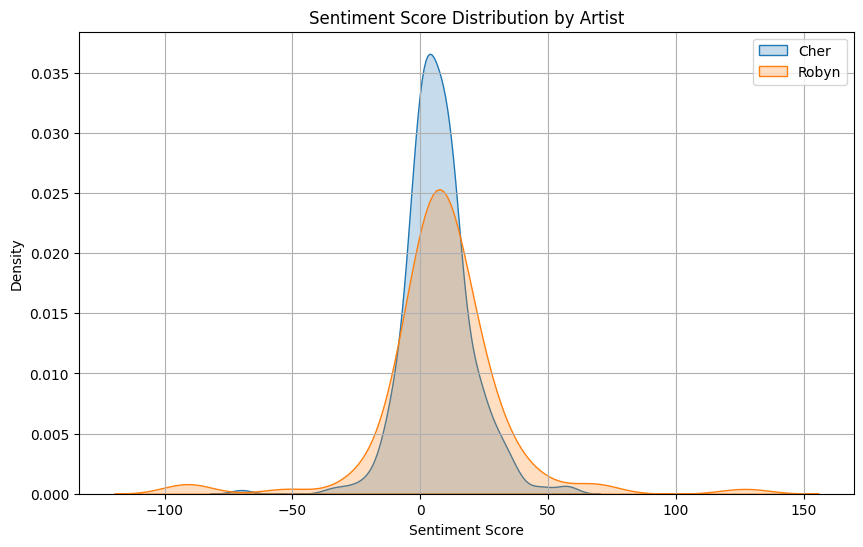

In [34]:
# Prepare data
cher_scores = list(song_sentiment_scores['cher'].values())
robyn_scores = list(song_sentiment_scores['robyn'].values())

# Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(cher_scores, label='Cher', fill=True)
sns.kdeplot(robyn_scores, label='Robyn', fill=True)

plt.title('Sentiment Score Distribution by Artist')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


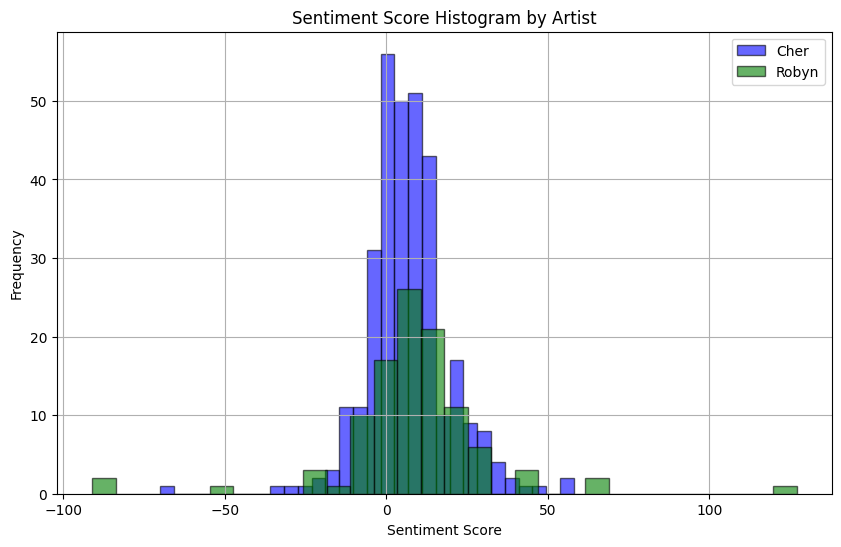

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(cher_scores, bins=30, alpha=0.6, label='Cher', color='blue', edgecolor='black')
plt.hist(robyn_scores, bins=30, alpha=0.6, label='Robyn', color='green', edgecolor='black')
plt.title("Sentiment Score Histogram by Artist")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
for artist in song_sentiment_scores:
    values = list(song_sentiment_scores[artist].values())
    print(f"{artist}: Mean={np.mean(values):.2f}, StdDev={np.std(values):.2f}")


cher: Mean=6.79, StdDev=13.04
robyn: Mean=8.62, StdDev=24.21


### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: Robyn has a higher average sentiment score per song compared to Cher. While Cher has more songs, Robyn’s songs generally contain more positive sentiment. On average, Robyn scores about 10.52 per song, while Cher scores around 7.49. This suggests Robyn’s lyrics carry a more positive emotional tone overall.

---

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: The three highest sentiment songs for Cher are filled with words like "love," "laughter," and "found," reflecting emotional fulfillment. The lowest sentiment songs contain negative themes like loss or anger, using words like "shot," "cry," and "alone." The sentiment scores are driven by the frequency of positive or negative words.

---

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: Robyn’s highest sentiment songs repeat words like “love” and “free,” boosting scores due to frequent positive terms. Her lowest sentiment songs include harsh or angry phrases like “don’t tell me what to do.” The sentiment score is driven by word frequency, not context, favoring repetition of strong emotional vocabulary.

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.

The sentiment score distributions show Cher’s songs cluster tightly around neutral to slightly positive scores, while Robyn’s songs are more spread out with more extreme values. Robyn has both highly positive and deeply negative songs, indicating stronger emotional swings. Density and histogram plots reveal these artist-specific sentiment patterns clearly.


## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [17]:
positive_emojis = {'😊', '😍', '😂', '❤️', '👍', '🎉', '😁', '🥳', '🌟', '😇'}
negative_emojis = {'😢', '😡', '😞', '💔', '👎', '😭', '😠', '🤬', '😩', '😓'}

twitter_data = {
    "cher": ["💔 Love is pain 😢", "❤️ Forever grateful 😊"],
    "robyn": ["😂 Life is funny", "😡 I can't take this"]
}


In [18]:
# your code here
emoji_sentiment_scores = {}

for artist, descriptions in twitter_data.items():
    total_score = 0
    total_followers = len(descriptions)  # Since each line = 1 follower
    for desc in descriptions:
        score = 0
        for char in desc:
            if char in positive_emojis:
                score += 1
            elif char in negative_emojis:
                score -= 1
        total_score += score
    avg_score = total_score / total_followers if total_followers > 0 else 0
    emoji_sentiment_scores[artist] = avg_score

# Print result
for artist, avg_score in emoji_sentiment_scores.items():
    print(f"{artist} - Avg Emoji Sentiment Score: {avg_score:.2f}")


cher - Avg Emoji Sentiment Score: -0.50
robyn - Avg Emoji Sentiment Score: 0.00


In [25]:
from collections import Counter

# Define emoji sets
positive_emojis = {'😊', '😍', '😂', '❤️', '👍', '🎉', '😁', '🥳', '🌟', '😇'}
negative_emojis = {'😢', '😡', '😞', '💔', '👎', '😭', '😠', '🤬', '😩', '😓'}

# Initialize counters
emoji_counts = {
    'cher': Counter(),
    'robyn': Counter()
}

# Count emojis
for artist, descriptions in twitter_data.items():
    for desc in descriptions:
        for char in desc:
            if char in positive_emojis or char in negative_emojis:
                emoji_counts[artist][char] += 1

# Get most common positive and negative emoji per artist
for artist in ['cher', 'robyn']:
    pos = [e for e in emoji_counts[artist].items() if e[0] in positive_emojis]
    neg = [e for e in emoji_counts[artist].items() if e[0] in negative_emojis]
    
    most_pos = max(pos, key=lambda x: x[1], default=("None", 0))
    most_neg = max(neg, key=lambda x: x[1], default=("None", 0))

    print(f"\n{artist.capitalize()}:\n  Most Used Positive Emoji: {most_pos[0]} ({most_pos[1]} times)\n  Most Used Negative Emoji: {most_neg[0]} ({most_neg[1]} times)")



Cher:
  Most Used Positive Emoji: 😊 (1 times)
  Most Used Negative Emoji: 💔 (1 times)

Robyn:
  Most Used Positive Emoji: 😂 (1 times)
  Most Used Negative Emoji: 😡 (1 times)


Q: What is the average sentiment of your two artists? 

A: The average emoji sentiment score for the two artists is:

Cher: -0.50 — slightly negative, suggesting her followers use more negative emojis.

Robyn: 0.00 — neutral, indicating a balanced use of positive and negative emojis.

This reflects subtle differences in follower emotional tone based on emoji usage.

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: For Cher, the most used positive emoji is 😊 and the most used negative emoji is 💔, each appearing once. For Robyn, 😂 is the top positive emoji and 😡 is the top negative emoji, also used once each. This suggests minimal emoji usage in follower descriptions for both artists.

